# Learning rule
A notebook to play with the learning rule

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

## Simple scenario with static patterns

In [2]:
N = 3
x = np.zeros(N)
x[1] = 1.0
x[2] = 1.0
w = np.zeros((N, N))
dw = 0.100
dt = 0.001

Let's implement the product of the elements of w with the outer proudct

In [3]:
np.outer(x, 1 - x)

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [4]:
np.outer(1 - x, x)

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [5]:
Nt = 300
for _ in range(Nt):
    normal = np.outer(x, x)
    negative = np.outer(1 - x, x)
    w += (dt / dw) * ( normal - negative ) 

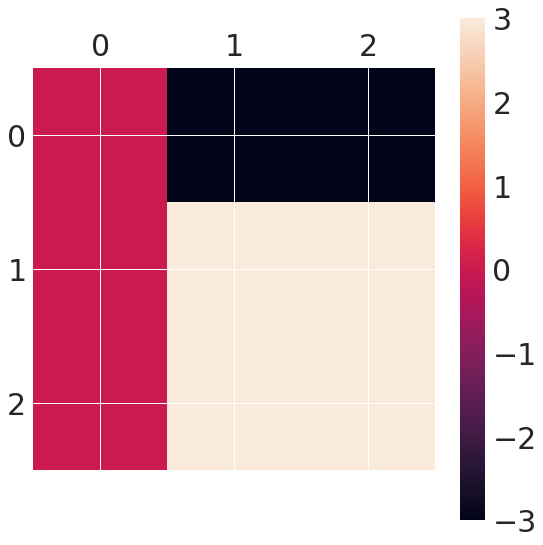

In [6]:
plt.matshow(w)
plt.colorbar();

## Dynamics

In [7]:
N = 4
Nt = 100

dynamics = np.zeros((Nt, N))
for i in range(0, 50):
    dynamics[i, 0] = 1
for i in range(25, 100):
    dynamics[i, 1] = 1
    
dynamics[:, 3] = 1.0

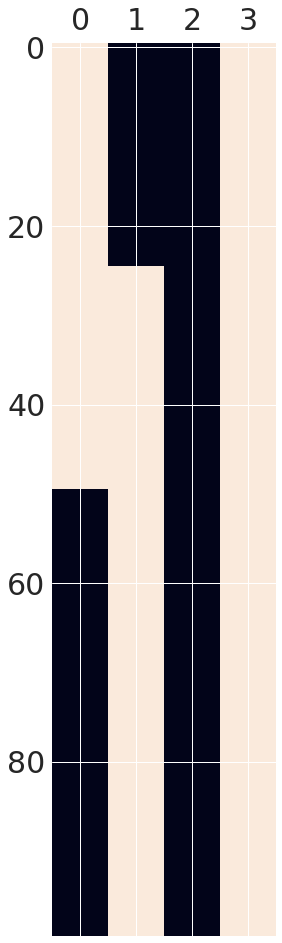

In [8]:
plt.matshow(dynamics, aspect='auto')

In [9]:
w = np.zeros((N, N))

for time in range(Nt):
    x = dynamics[time, :]
    normal = np.outer(x, x)
    negative = np.outer(1 - x, x)
    w += (dt / dw) * ( (1 - w ) * normal - negative )

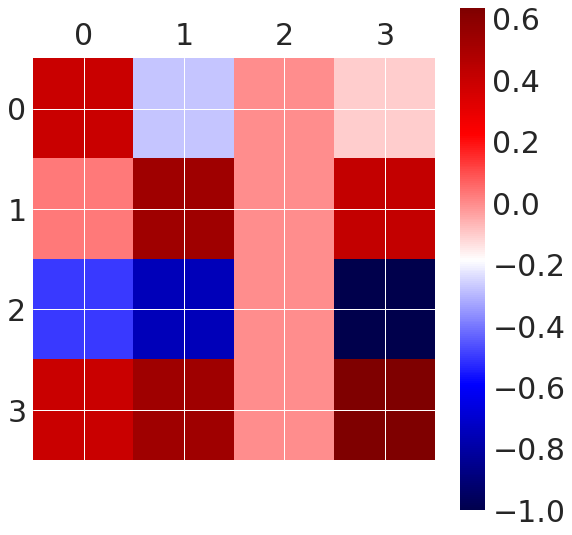

In [10]:
plt.matshow(w, cmap='seismic')
plt.colorbar()

This is good because when 2 was not activated all the other patterns (When they were activated created a negative connection to them)

In [11]:
N = 10

T = 3.0
training_time = 0.100
inter_sequence_time = 0.0
dt = 0.001

time_steps = int(T / dt)
sequence = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
training_steps = int(training_time /dt)
inter_sequence_steps = int(inter_sequence_time / dt)

x = np.zeros((time_steps, N))



time = 0
while(time < time_steps):
    for element in sequence:
        for i in range(training_steps):
            x[time, element] = 1.0
            time += 1
    for i in range(inter_sequence_steps):
        time += 1

In [12]:
tau_z = 0.100
tau_z_post = 0.005
dw = 0.050
z = np.zeros(N)
z_post = np.zeros((N))

z_history = np.zeros((time_steps, N))
z_post_history = np.zeros((time_steps, N))
w = np.zeros((N, N))


for index, x_example in enumerate(x):
    z += (dt / tau_z) * (x_example - z)
    z_post += (dt / tau_z_post) * (x_example - z_post)
    z_history[index, :] = z
    z_post_history[index, :] = z_post
    
    normal = np.outer(z_post, z)
    negative = np.outer(1 - z_post, z)
    w += (dt / dw) * ( (5 - w) * normal - negative)

Let's plot this

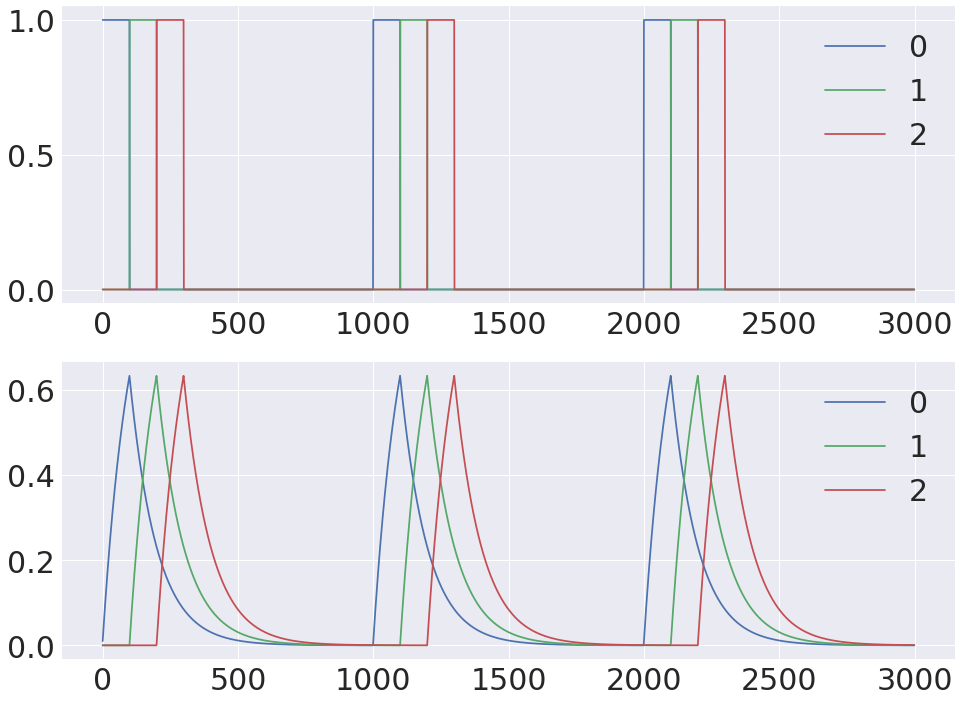

In [13]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

to_plot = sequence
to_plot = [0, 1, 2]
for element in to_plot:
    ax1.plot(x[:, element], label=str(element))
    ax2.plot(z_history[:, element], label=str(element))

ax2.legend()
ax1.legend();


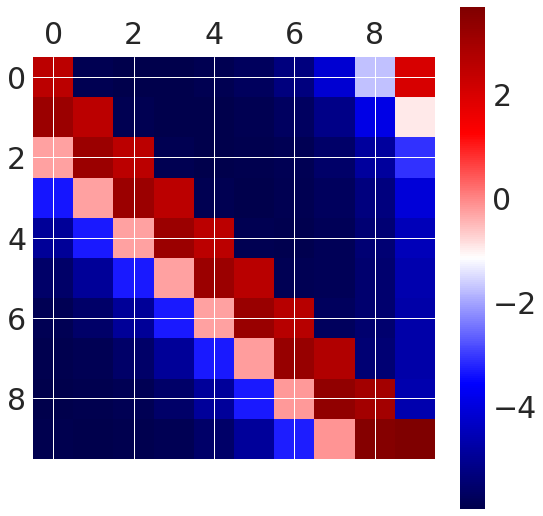

In [14]:
plt.matshow(w, cmap='seismic')
plt.colorbar()

In [15]:
from network import run_network_recall

In [16]:
G = 100.0
tau_m = 0.010
T = 3.0
I_cue = 0
T_cue = 0.200
dt = dt
threshold = 0.5

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

../network.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-G * x))


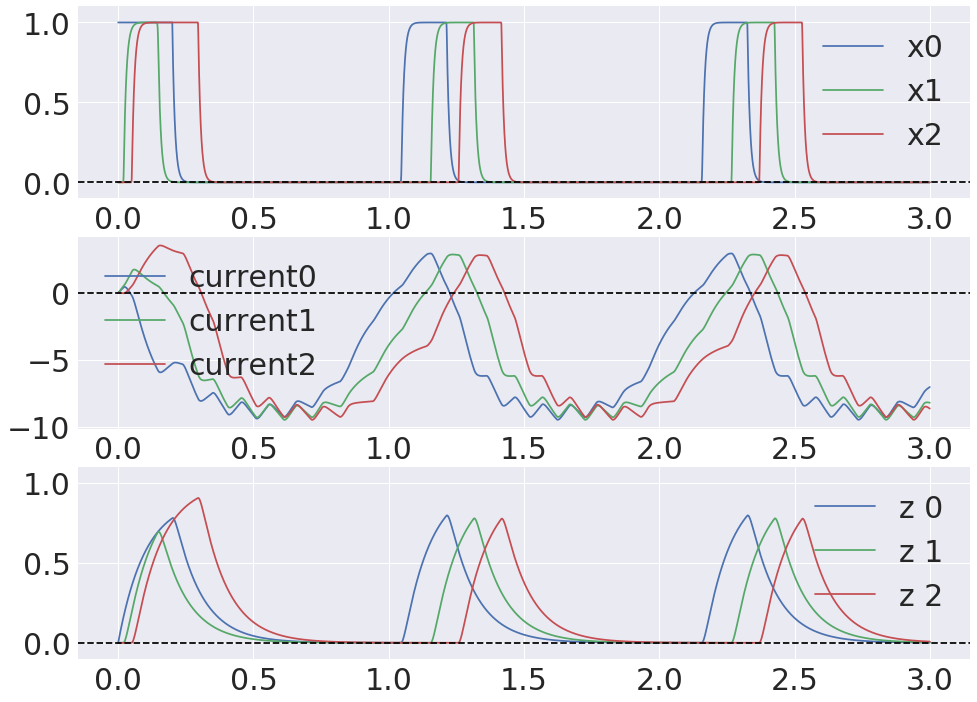

In [17]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

## Making the training function a sequence

In [18]:
N = 10

training_time = 0.100
inter_sequence_time = 0
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [5, 6, 7, 8]
sequences = [sequence1, sequence2]
time_steps = int(T / dt)
# def train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z, tau_z_post, tau_w):

w = np.zeros((N, N))

inter_sequence_steps = int(inter_sequence_time / dt)

x_total = np.array([]).reshape(0, N)
for sequence in sequences:
    n_sequence = len(sequence)
    training_steps = int(training_time / dt)
    
    for element in sequence:
        x = np.zeros((training_steps, N))
        for time in range(training_steps):
            x[time, element] = 1.0
        # Concatenate for the total history
        x_total = np.concatenate((x_total, x), axis=0)
    
    # Inter-sequence steps
    x = np.zeros((inter_sequence_steps, N))
    x_total = np.concatenate((x_total, x), axis=0)

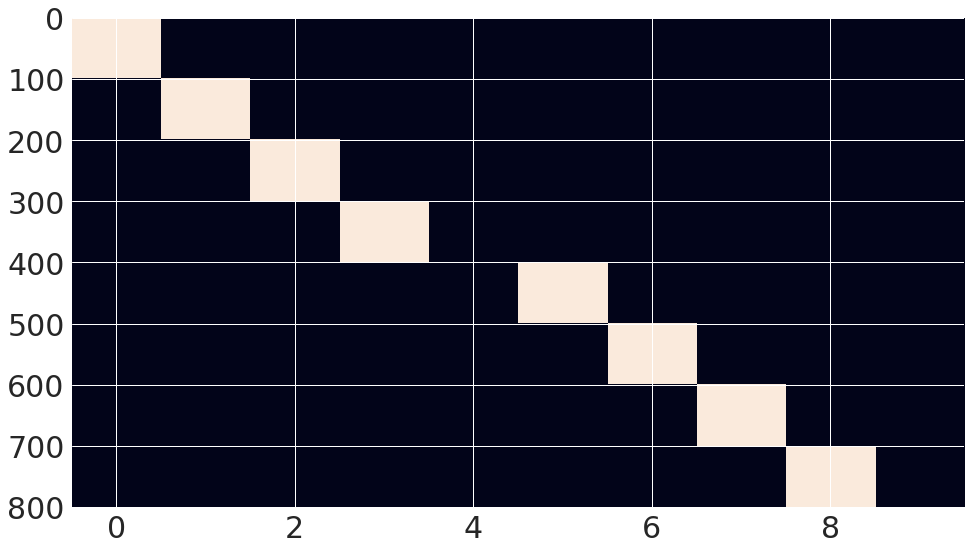

In [19]:
plt.imshow(x_total, aspect='auto')

In [20]:
tau_z = 0.100
tau_z_post = 0.005
dw = 0.050
z = np.zeros(N)
z_post = np.zeros((N))

z_history = np.zeros_like(x_total)
z_post_history = np.zeros_like(x_total)


for index, x_example in enumerate(x_total):
    z += (dt / tau_z) * (x_example - z)
    z_post += (dt / tau_z_post) * (x_example - z_post)
    z_history[index, :] = z
    z_post_history[index, :] = z_post
    
    normal = np.outer(z_post, z)
    negative = np.outer(1 - z_post, z)
    w += (dt / dw) * ( (5 - w) * normal - negative)

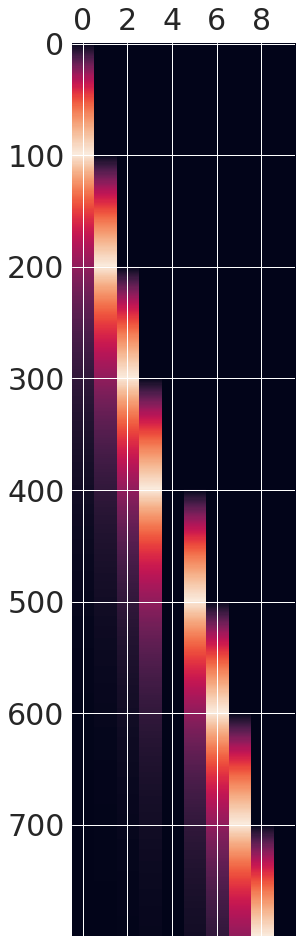

In [21]:
plt.matshow(z_history, aspect='auto')

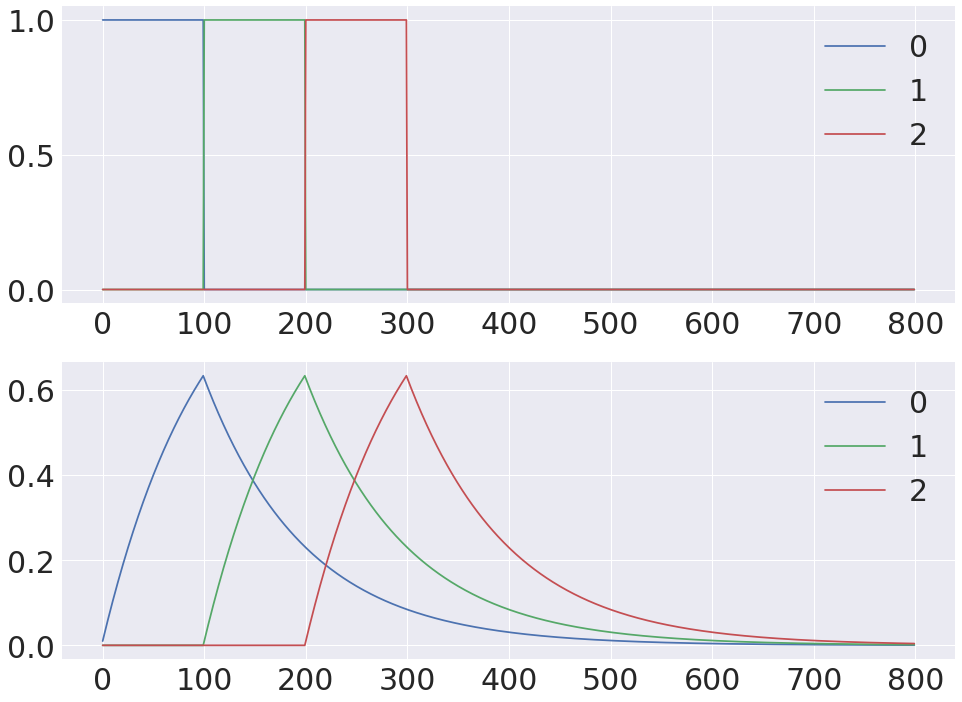

In [22]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

to_plot = sequence
to_plot = [0, 1, 2]
for element in to_plot:
    ax1.plot(x_total[:, element], label=str(element))
    ax2.plot(z_history[:, element], label=str(element))

ax2.legend()
ax1.legend();

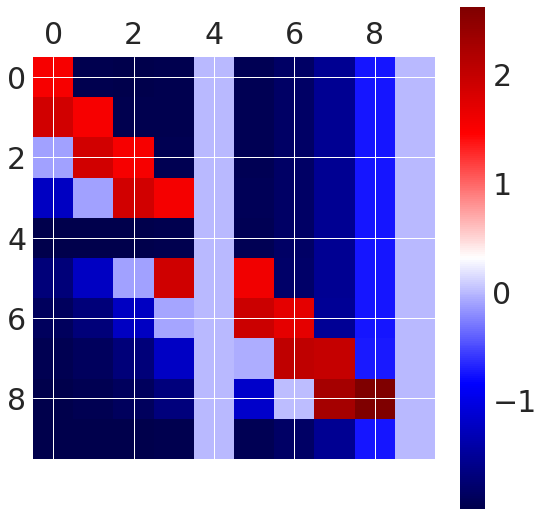

In [23]:
plt.matshow(w, cmap='seismic')
plt.colorbar()

In [49]:
N = 10
tau_z = 0.100
tau_z_post = 0.005
tau_w = 0.050

training_time = 0.100
inter_sequence_time = 1.000
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [5, 6, 7, 8]
sequences = [sequence1, sequence2]

from network import train_network

In [52]:
aux = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, max_w=5.0, min_w=None)

w, x_total, z_history, z_post_history = aux

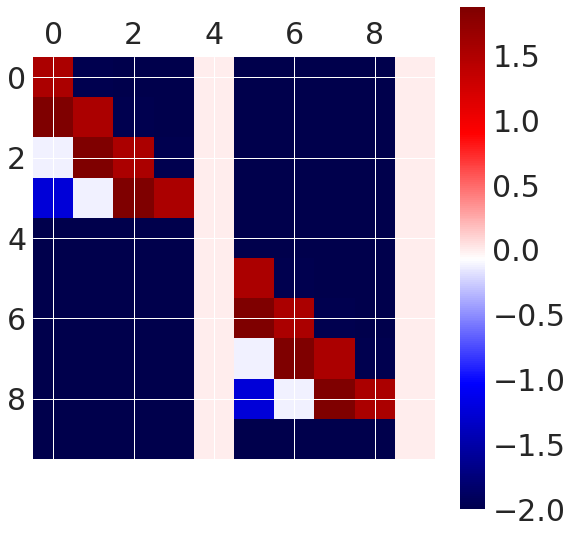

In [53]:
plt.matshow(w, cmap='seismic')
plt.colorbar()

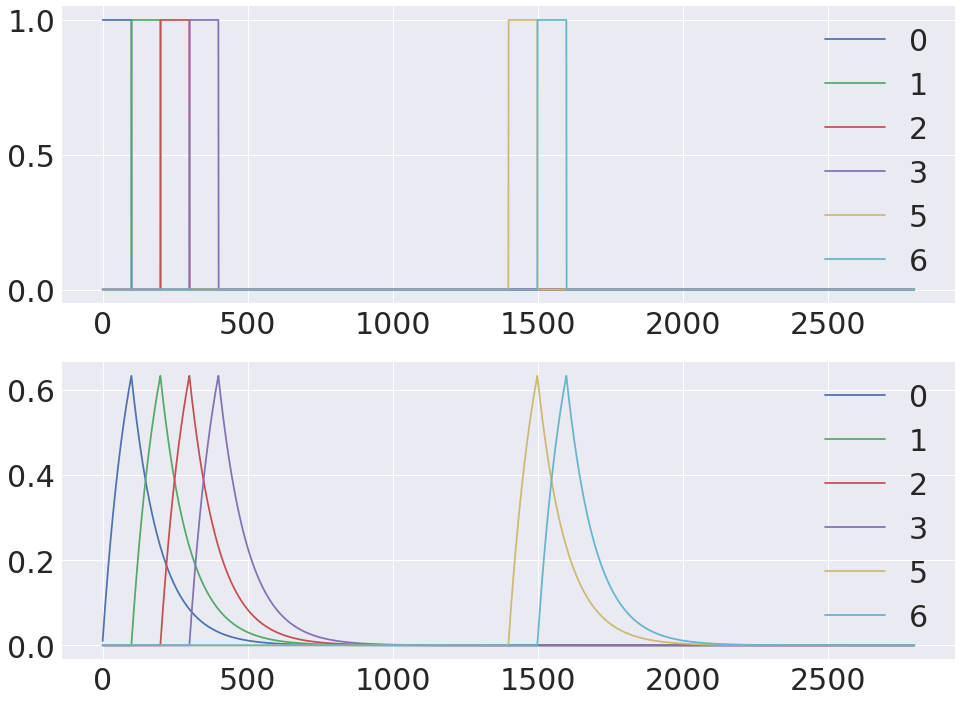

In [54]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

to_plot = sequence
to_plot = [0, 1, 2, 3, 5, 6]
for element in to_plot:
    ax1.plot(x_total[:, element], label=str(element))
    ax2.plot(z_history[:, element], label=str(element))

ax2.legend()
ax1.legend();

Let's recall this network behavior

In [57]:
G = 100.0
tau_m = 0.010
T = 3.0
I_cue = 0
T_cue = 0.050
dt = dt
threshold = 0.5

dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

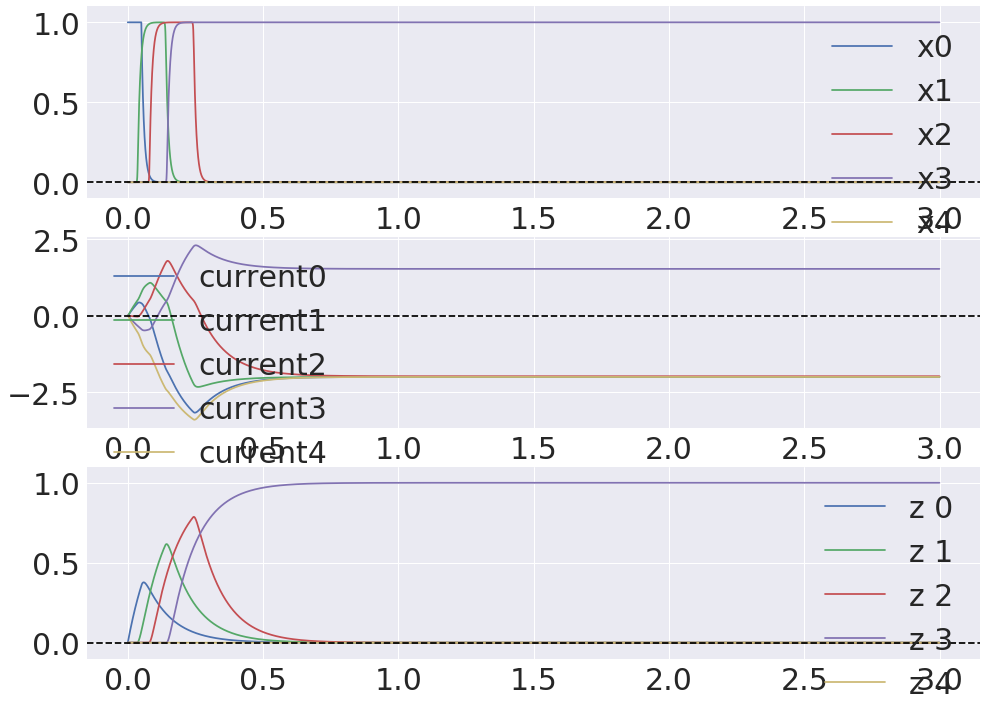

In [59]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2, 3, 4]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();